Перший погляд на дані

In [9]:
import numpy as np
import pandas as pd
import nltk
import re
import random
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from imblearn.ensemble import BalancedBaggingClassifier
from data_print import data_class_display,PCA_text_data_display,pp_conf_matrix
from EstimatorSelectionHelper import GridSearchCV_Classifiers, Best_Classifiers
from sklearn.feature_selection import SelectFromModel
from ukrainian_stemmer import UkrainianStemmer


pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)   

land_data=pd.read_csv('land_real_estate.csv').replace(np.nan, "")
land_data['text']=land_data['description']+' '+land_data['land_types_source']+' '+land_data['land_types_PcmU']
def land_types_download():    
    data=pd.read_csv('land_types.csv')
    data=data[['id','land_types']]
    data=data.set_index('id')
    data=data.T
    data=data.to_dict('records')
    return (data[0])

land_types=land_types_download()
built_up={0:'Не забудована',1:'Забудована'}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


Приклад використання класу CountVectorizer()

In [2]:
print ('Перших 4 оголошення:')
print (land_data['text'][:4])
count = CountVectorizer()
bag = count.fit_transform(land_data['text'][:4])
print(count.get_feature_names())
print(bag.toarray())

Перших 4 оголошення:
0     комерційного           
1     під забудову           
2     садівництво            
3     сільськогосподарського 
Name: text, dtype: object
['забудову', 'комерційного', 'під', 'садівництво', 'сільськогосподарського']
[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Приклад використання класу TfidfVectorizer()

In [3]:
print ('Перших 4 оголошення:')
print (land_data['text'][:4])
count = TfidfVectorizer()
bag = count.fit_transform(land_data['text'][:4])
print(count.get_feature_names())
print(bag.toarray())

Перших 4 оголошення:
0     комерційного           
1     під забудову           
2     садівництво            
3     сільськогосподарського 
Name: text, dtype: object
['забудову', 'комерційного', 'під', 'садівництво', 'сільськогосподарського']
[[0.         1.         0.         0.         0.        ]
 [0.70710678 0.         0.70710678 0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]


Приклад використання об'єкта-конвеєра Pipeline()

In [4]:
vectorizer=TfidfVectorizer()
clf=LinearSVC()
pipe=Pipeline([('Vectorizer',vectorizer),
                   ('clf',clf)])
clf=pipe.fit(land_data['text'][:100],land_data['land_types'][:100])
print ("Точність класифікатора на навчальних даних:", clf.score(land_data['text'][:100],land_data['land_types'][:100]))
print ("Точність класифікатора на тестових даних:", clf.score(land_data['text'][100:130],land_data['land_types'][100:130]))

Точність класифікатора на навчальних даних: 0.99
Точність класифікатора на тестових даних: 0.8


Приклад використання train_test_split()

In [5]:
X_train_zab, X_test_zab, y_train_zab, y_test_zab=train_test_split(land_data['text'],land_data['built_up'],
                                                                  stratify=land_data['built_up'],
                                                                  test_size=0.33,random_state=0)

X_train, X_test, y_train, y_test=train_test_split(land_data['text'],land_data['land_types'],
                                                  stratify=land_data['land_types'],
                                                  test_size=0.33,random_state=0)

Приклад використання GridSearchCV()

In [6]:
vectorizer=TfidfVectorizer()
clf=LinearSVC()
pipe=Pipeline([('Vectorizer',vectorizer),
                   ('clf',clf)])
parameters = {'Vectorizer__ngram_range':[(1,1),(1,3)],
              'clf__C':(0.01, 1.0, 10.0), 
              'clf__penalty':['l1', 'l2'], 
              'clf__dual':[False]}

grid_search = GridSearchCV(pipe, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
results=grid_search.cv_results_
for mean_score, params in sorted(zip(results['mean_test_score'],results['params']), reverse=True):
    print('accuracy - {0:.2%}, params: {1}'.format(mean_score, params))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the 

accuracy - 95.09%, params: {'Vectorizer__ngram_range': (1, 3), 'clf__C': 10.0, 'clf__dual': False, 'clf__penalty': 'l1'}
accuracy - 94.77%, params: {'Vectorizer__ngram_range': (1, 1), 'clf__C': 10.0, 'clf__dual': False, 'clf__penalty': 'l1'}
accuracy - 94.04%, params: {'Vectorizer__ngram_range': (1, 1), 'clf__C': 10.0, 'clf__dual': False, 'clf__penalty': 'l2'}
accuracy - 93.76%, params: {'Vectorizer__ngram_range': (1, 1), 'clf__C': 1.0, 'clf__dual': False, 'clf__penalty': 'l1'}
accuracy - 93.62%, params: {'Vectorizer__ngram_range': (1, 1), 'clf__C': 1.0, 'clf__dual': False, 'clf__penalty': 'l2'}
accuracy - 93.55%, params: {'Vectorizer__ngram_range': (1, 3), 'clf__C': 1.0, 'clf__dual': False, 'clf__penalty': 'l1'}
accuracy - 93.48%, params: {'Vectorizer__ngram_range': (1, 3), 'clf__C': 10.0, 'clf__dual': False, 'clf__penalty': 'l2'}
accuracy - 92.39%, params: {'Vectorizer__ngram_range': (1, 3), 'clf__C': 1.0, 'clf__dual': False, 'clf__penalty': 'l2'}
accuracy - 72.26%, params: {'Vectori

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Приклад використання RandomizedSearchCV()

In [7]:
vectorizer=TfidfVectorizer()
clf=LinearSVC()
pipe=Pipeline([('Vectorizer',vectorizer),
                   ('clf',clf)])
parameters = {'Vectorizer__ngram_range':[(1,1),(1,3)],
              'clf__C':(0.01, 1.0, 10.0), 
              'clf__penalty':['l1', 'l2'], 
              'clf__dual':[False]}

random_search = RandomizedSearchCV(pipe, parameters, cv=5, scoring='accuracy',n_iter=5)
random_search.fit(X_train, y_train)
results=random_search.cv_results_
for mean_score, params in sorted(zip(results['mean_test_score'],results['params']), reverse=True):
    print('accuracy - {0:.2%}, params: {1}'.format(mean_score, params))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


accuracy - 94.04%, params: {'clf__penalty': 'l2', 'clf__dual': False, 'clf__C': 10.0, 'Vectorizer__ngram_range': (1, 1)}
accuracy - 93.55%, params: {'clf__penalty': 'l1', 'clf__dual': False, 'clf__C': 1.0, 'Vectorizer__ngram_range': (1, 3)}
accuracy - 72.26%, params: {'clf__penalty': 'l2', 'clf__dual': False, 'clf__C': 0.01, 'Vectorizer__ngram_range': (1, 1)}
accuracy - 62.57%, params: {'clf__penalty': 'l1', 'clf__dual': False, 'clf__C': 0.01, 'Vectorizer__ngram_range': (1, 1)}
accuracy - 62.19%, params: {'clf__penalty': 'l1', 'clf__dual': False, 'clf__C': 0.01, 'Vectorizer__ngram_range': (1, 3)}


Приклад використання функції GridSearchCV_Classifiers()

Running GridSearchCV for CountVectorizer+LinearSVC.
Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   17.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for TfidfVectorizer+LinearSVC.
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.7s finished


CountVectorizer+LinearSVC
TfidfVectorizer+LinearSVC
                    estimator min_score mean_score max_score    std_score  \
0   TfidfVectorizer+LinearSVC  0.938596  0.951239   0.970228  0.0123418     
1   CountVectorizer+LinearSVC  0.938596  0.951239   0.970228  0.0123418     
2   CountVectorizer+LinearSVC  0.929825  0.947384   0.964912  0.0124163     
3   TfidfVectorizer+LinearSVC  0.924561  0.946331   0.966667  0.0144605     
4   CountVectorizer+LinearSVC  0.924561  0.94037    0.95614   0.012659      
5   TfidfVectorizer+LinearSVC  0.924561  0.94037    0.95614   0.012659      
6   CountVectorizer+LinearSVC  0.924561  0.94037    0.95614   0.012659      
7   CountVectorizer+LinearSVC  0.914035  0.93756    0.957895  0.016645      
8   TfidfVectorizer+LinearSVC  0.914035  0.93756    0.957895  0.016645      
9   CountVectorizer+LinearSVC  0.915789  0.936159   0.950877  0.0135392     
10  CountVectorizer+LinearSVC  0.915789  0.936159   0.950877  0.0135392     
11  TfidfVectorizer+Line

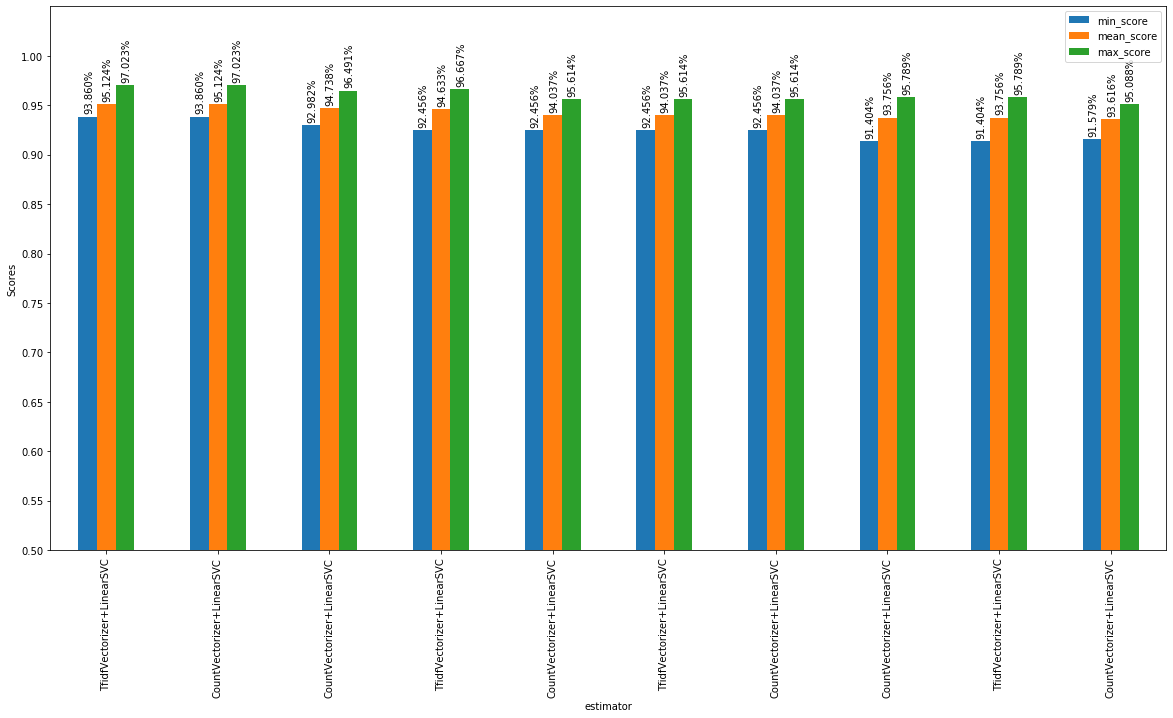

________________________________________________________________________


In [8]:
models_params = {
    'CountVectorizer+LinearSVC': (Pipeline([('Vectorizer',TfidfVectorizer()),
                            ('clf',LinearSVC())]),
                  [{'Vectorizer__ngram_range':[(1,1),(1,3)],
                   'clf__C':(0.01, 1.0, 10.0), 
                   'clf__penalty':['l2'], 
                   'clf__dual':[True]},
                  {'Vectorizer__ngram_range':[(1,1),(1,3)],
                   'clf__C':(0.01, 1.0, 10.0), 
                   'clf__penalty':['l1', 'l2'], 
                   'clf__dual':[False]}]),
    'TfidfVectorizer+LinearSVC': (Pipeline([('Vectorizer',TfidfVectorizer()),
                            ('clf',LinearSVC())]),
                  {'Vectorizer__ngram_range':[(1,1),(1,3)],
                   'clf__C':(0.01, 1.0, 10.0), 
                   'clf__penalty':['l1', 'l2'], 
                   'clf__dual':[False]})
}

GridSearchCV_Classifiers(X=X_train, y=y_train,
                         models_params=models_params,scoring='accuracy',cv=5)
                        

Приклад використання функції Data_Augmentation()

In [9]:
def Data_Augmentation(number):
    unigrams_list=['продаж','земельна', 'ділянка', 'іншої', 'інфраструктура', 'інструменту', 'інвентарю', 'ізумрудє', 'івасюка',
                   'яром', 'яворівського', 'шанове', 'чудова','цін', 'цільових', 'цілу', 'цілорічно', 'участке', 'тільки', 'тухолька', 
                   'турківський', 'твердій','сухий', 'суха', 'сусідніх', 'сусідні', 'судова',  'сторони', 'сто', 'стихії','селі', 'села',  
                   'сайті', 'руська', 'росташування','рокитне', 'розташовану', 'розташований', 'розміщені', 'розміщення', 'розміщений', 'розмірі', 
                   'розділена', 'покупцю', 'показ', 'повідомлення', 'питання']
   
    random.seed(0)
    random_words=[unigrams_list[index] for index in random.sample(range(len(unigrams_list)), len(unigrams_list))]
    tsv='для ведення товарного сільськогосподарського виробництва'
    df = pd.DataFrame(columns=['text','land_types','built_up'])
    for sample_index in range(number):
        df = df.append({'text': tsv+' '+" ".join(random.sample(random_words, random.randint(0,20))),'land_types':6,'built_up':0}, ignore_index=True)
    return df.astype({'text':'object','land_types': 'int32','built_up': 'int32'})

Data_Augmentation(34)

,text,land_types,built_up
0,для ведення товарного сільськогосподарського виробництва руська турківський цільових сусідніх чудова шанове стихії інвентарю розташований сайті івасюка росташування,6,0
1,для ведення товарного сільськогосподарського виробництва сухий повідомлення цілу села продаж розташований розмірі,6,0
2,для ведення товарного сільськогосподарського виробництва сусідні участке питання рокитне тухолька розташовану стихії повідомлення тільки суха продаж цілу села яром розташований,6,0
3,для ведення товарного сільськогосподарського виробництва інвентарю рокитне розділена івасюка розташовану ділянка чудова розміщення твердій сайті села селі сухий суха покупцю іншої показ розміщені,6,0
4,для ведення товарного сільськогосподарського виробництва розміщений інструменту інвентарю тільки сто показ турківський земельна цілу шанове розміщені села розташований тухолька цільових стихії,6,0
5,для ведення товарного сільськогосподарського виробництва інвентарю судова розміщений тухолька росташування інфраструктура,6,0
6,для ведення товарного сільськогосподарського виробництва стихії яворівського цілорічно сусідні сухий,6,0
7,для ведення товарного сільськогосподарського виробництва ділянка покупцю цільових повідомлення ізумрудє сайті судова,6,0
8,для ведення товарного сільськогосподарського виробництва цільових івасюка ізумрудє,6,0
9,для ведення товарного сільськогосподарського виробництва тухолька іншої села інфраструктура земельна ділянка ізумрудє судова івасюка розділена турківський твердій тільки цілорічно чудова яворівського участке інструменту,6,0


Порівняння класифікаторів із базовими параметрами

C:\Users\User\Documents\article\data_print.py:50: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fracs, labels=labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)


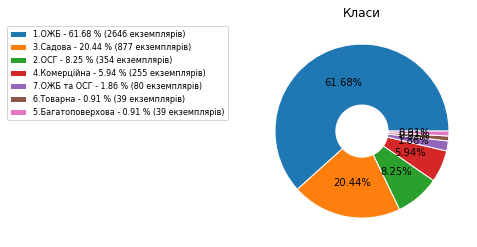

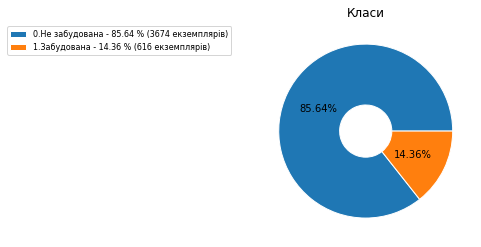

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.9s remaining:   19.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for LinearSVC.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for LogisticRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for BaggingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for BalancedBaggingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for MLPClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for ComplementNB.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


ExtraTreesClassifier
RandomForestClassifier
GradientBoostingClassifier
LinearSVC
LogisticRegression
DecisionTreeClassifier
BaggingClassifier
BalancedBaggingClassifier
MLPClassifier
ComplementNB
                    estimator min_score mean_score max_score   std_score  \
0  BaggingClassifier           0.773776  0.823822   0.875     0.0338703    
1  GradientBoostingClassifier  0.79146   0.811187   0.833215  0.0148887    
2  DecisionTreeClassifier      0.712908  0.792626   0.849054  0.0451708    
3  LinearSVC                   0.761881  0.770461   0.782735  0.0076729    
4  RandomForestClassifier      0.715469  0.73287    0.756256  0.016153     
5  BalancedBaggingClassifier   0.707433  0.72556    0.750345  0.0159746    
6  MLPClassifier               0.686197  0.715378   0.73578   0.0184259    
7  ExtraTreesClassifier        0.692845  0.707064   0.72325   0.00997801   
8  LogisticRegression          0.596208  0.614116   0.624169  0.0111831    
9  ComplementNB                0.572747  0.613

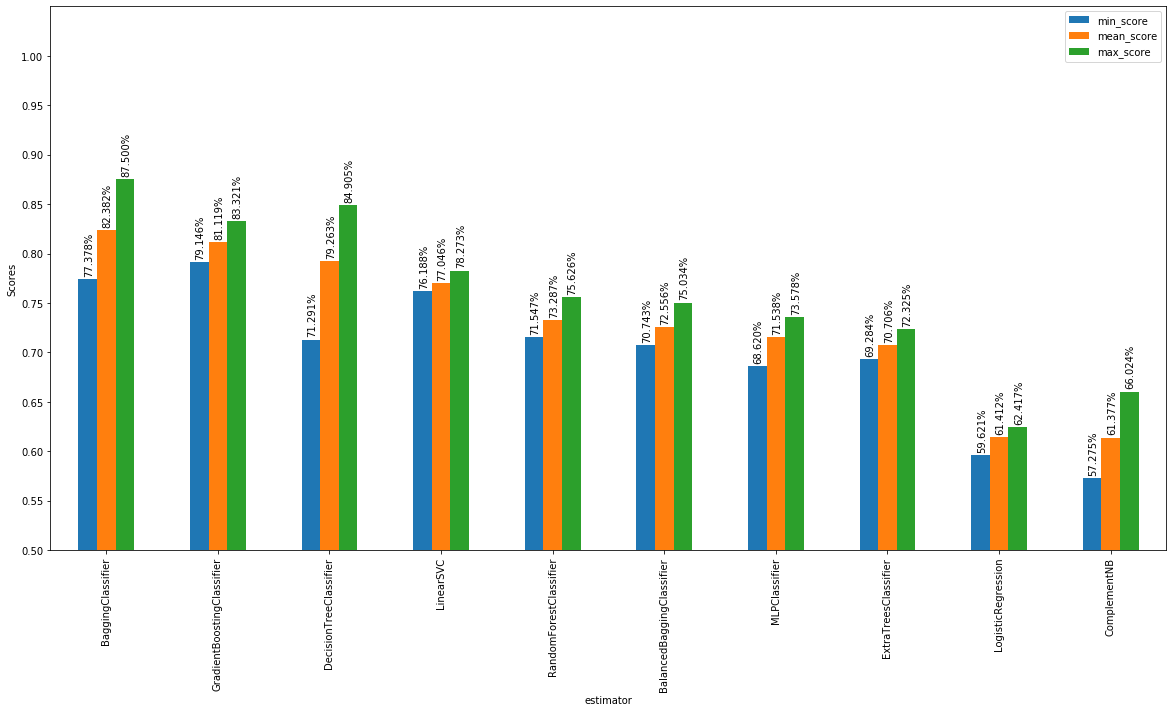

________________________________________________________________________
Running GridSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for LinearSVC.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for LogisticRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for BaggingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for BalancedBaggingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for MLPClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for ComplementNB.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


ExtraTreesClassifier
RandomForestClassifier
GradientBoostingClassifier
LinearSVC
LogisticRegression
DecisionTreeClassifier
BaggingClassifier
BalancedBaggingClassifier
MLPClassifier
ComplementNB
                    estimator min_score mean_score max_score  std_score  \
0  BaggingClassifier           0.848741  0.873041   0.886212  0.0135045   
1  LinearSVC                   0.847866  0.871329   0.892225  0.0142656   
2  GradientBoostingClassifier  0.847097  0.863946   0.875607  0.0116858   
3  DecisionTreeClassifier      0.813839  0.845506   0.874212  0.0207623   
4  BalancedBaggingClassifier   0.805161  0.842453   0.87575   0.0237339   
5  ExtraTreesClassifier        0.797549  0.833909   0.858543  0.0217125   
6  MLPClassifier               0.801488  0.826555   0.853256  0.0204938   
7  RandomForestClassifier      0.788887  0.808723   0.849647  0.0218557   
8  LogisticRegression          0.713079  0.743386   0.792099  0.0289638   
9  ComplementNB                0.638351  0.684121   0.73

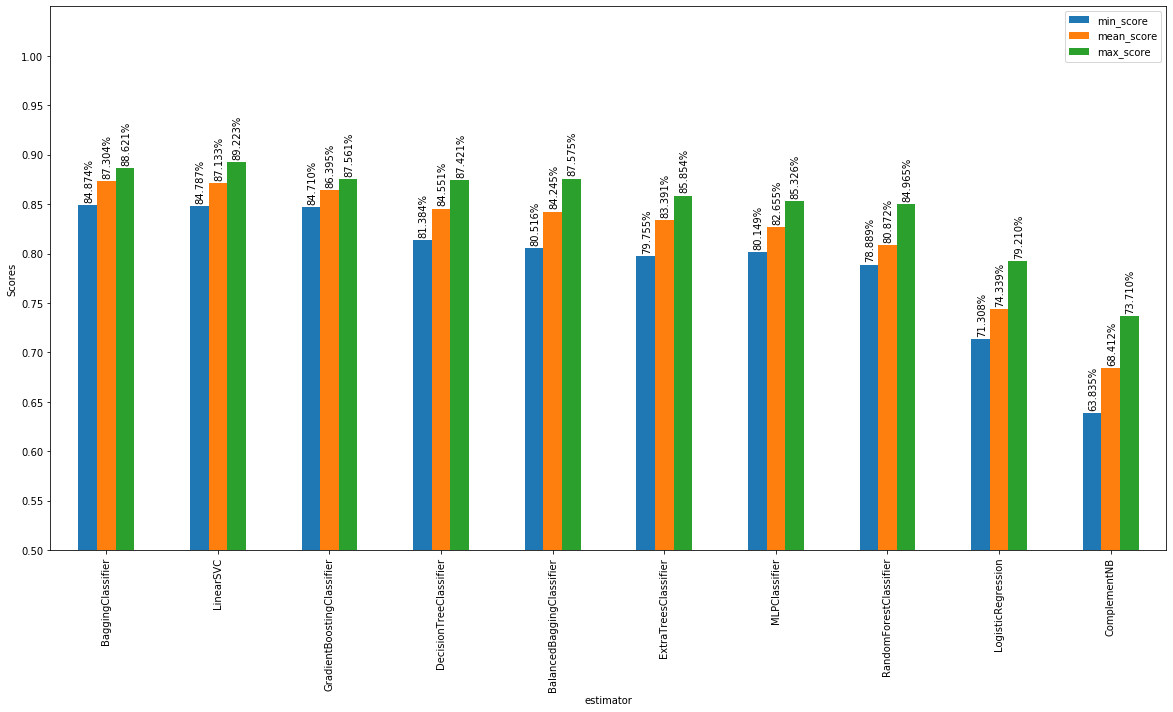

________________________________________________________________________


In [4]:
import numpy as np
import pandas as pd
import nltk
import re
import random
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from imblearn.ensemble import BalancedBaggingClassifier
from data_print import data_class_display,PCA_text_data_display,pp_conf_matrix
from EstimatorSelectionHelper import GridSearchCV_Classifiers, Best_Classifiers
from sklearn.feature_selection import SelectFromModel  

land_data=pd.read_csv('land_real_estate.csv').replace(np.nan, "")
land_data['text']=land_data['description']+' '+land_data['land_types_source']+' '+land_data['land_types_PcmU']
def land_types_download():    
    data=pd.read_csv('land_types.csv')
    data=data[['id','land_types']]
    data=data.set_index('id')
    data=data.T
    data=data.to_dict('records')
    return (data[0])

land_types=land_types_download()
built_up={0:'Не забудована',1:'Забудована'}

def Data_Augmentation(number):
    unigrams_list=['продаж','земельна', 'ділянка', 'іншої', 'інфраструктура', 'інструменту', 'інвентарю', 'ізумрудє', 'івасюка',
                   'яром', 'яворівського', 'шанове', 'чудова','цін', 'цільових', 'цілу', 'цілорічно', 'участке', 'тільки', 'тухолька', 
                   'турківський', 'твердій','сухий', 'суха', 'сусідніх', 'сусідні', 'судова',  'сторони', 'сто', 'стихії','селі', 'села',  
                   'сайті', 'руська', 'росташування','рокитне', 'розташовану', 'розташований', 'розміщені', 'розміщення', 'розміщений', 'розмірі', 
                   'розділена', 'покупцю', 'показ', 'повідомлення', 'питання']
   
    random.seed(0)
    random_words=[unigrams_list[index] for index in random.sample(range(len(unigrams_list)), len(unigrams_list))]
    tsv='для ведення товарного сільськогосподарського виробництва'
    df = pd.DataFrame(columns=['text','land_types','built_up'])
    for sample_index in range(number):
        df = df.append({'text': tsv+' '+" ".join(random.sample(random_words, random.randint(0,20))),'land_types':6,'built_up':0}, ignore_index=True)
    return df.astype({'text':'object','land_types': 'int32','built_up': 'int32'})

land_data=land_data.append(Data_Augmentation(34), ignore_index=True)
data_class_display(dataframe=land_data,class_column='land_types',expl_lables=land_types)
data_class_display(dataframe=land_data,class_column='built_up',expl_lables=built_up)

X_train_zab, X_test_zab, y_train_zab, y_test_zab=train_test_split(land_data['text'],land_data['built_up'],
                                                                  stratify=land_data['built_up'],
                                                                  test_size=0.33,random_state=0)

X_train, X_test, y_train, y_test=train_test_split(land_data['text'],land_data['land_types'],
                                                  stratify=land_data['land_types'],
                                                  test_size=0.33,random_state=0)


models_params_0={ 
          'ExtraTreesClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),('clf',ExtraTreesClassifier())]),
                                       {'Vectorizer__ngram_range':[(1,1)]}],
          'RandomForestClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),('clf',RandomForestClassifier())]),
                                       {'Vectorizer__ngram_range':[(1,1)]}],         
          'GradientBoostingClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),('clf',GradientBoostingClassifier())]),
                                       {'Vectorizer__ngram_range':[(1,1)]}],
          'LinearSVC': [Pipeline([('Vectorizer',TfidfVectorizer()),('clf',LinearSVC())]),
                                       {'Vectorizer__ngram_range':[(1,1)]}],    
          'LogisticRegression': [Pipeline([('Vectorizer',TfidfVectorizer()),('clf',LogisticRegression())]),
                                       {'Vectorizer__ngram_range':[(1,1)]}], 
          'DecisionTreeClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),('clf',tree.DecisionTreeClassifier())]),
                                       {'Vectorizer__ngram_range':[(1,1)]}],           
          'BaggingClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),('clf',BaggingClassifier())]),
                                       {'Vectorizer__ngram_range':[(1,1)]}],           
          'BalancedBaggingClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),('clf',BalancedBaggingClassifier())]),
                                       {'Vectorizer__ngram_range':[(1,1)]}], 
          'MLPClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),('clf',MLPClassifier())]),
                                       {'Vectorizer__ngram_range':[(1,1)]}],     
          'ComplementNB': [Pipeline([('Vectorizer',TfidfVectorizer()),('clf',ComplementNB())]),
                                       {'Vectorizer__ngram_range':[(1,1)]}],     
    
}



GridSearchCV_Classifiers(X=X_train, y=y_train,
                         models_params=models_params_0,scoring='f1_macro',cv=5)

GridSearchCV_Classifiers(X=X_train_zab, y=y_train_zab,
                         models_params=models_params_0,scoring='f1_macro',cv=5)


Приклад використання функції GridSearchCV_Classifiers для пошуку гіперпараметрів для класу LinearSVC

Running GridSearchCV for LinearSVC.
Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 44.6min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed: 48.6min finished


LinearSVC
     estimator min_score mean_score max_score   std_score  \
0    LinearSVC  0.84492   0.86829    0.89706   0.0176354    
1    LinearSVC  0.851492  0.867914   0.889606  0.0144955    
2    LinearSVC  0.852215  0.866212   0.902464  0.0187669    
3    LinearSVC  0.833703  0.863688   0.884489  0.0174104    
4    LinearSVC  0.841427  0.861925   0.889117  0.0159444    
5    LinearSVC  0.841427  0.861925   0.889117  0.0159444    
6    LinearSVC  0.841427  0.860905   0.878965  0.0159915    
7    LinearSVC  0.825035  0.860853   0.890105  0.0216507    
8    LinearSVC  0.811283  0.860683   0.885866  0.0261245    
9    LinearSVC  0.839164  0.858912   0.889117  0.0168052    
10   LinearSVC  0.818356  0.858584   0.905224  0.029095     
11   LinearSVC  0.825035  0.857478   0.878548  0.0190527    
12   LinearSVC  0.825035  0.857478   0.878548  0.0190527    
13   LinearSVC  0.839164  0.857139   0.880251  0.013707     
14   LinearSVC  0.821939  0.856742   0.904414  0.0268143    
15   LinearSVC

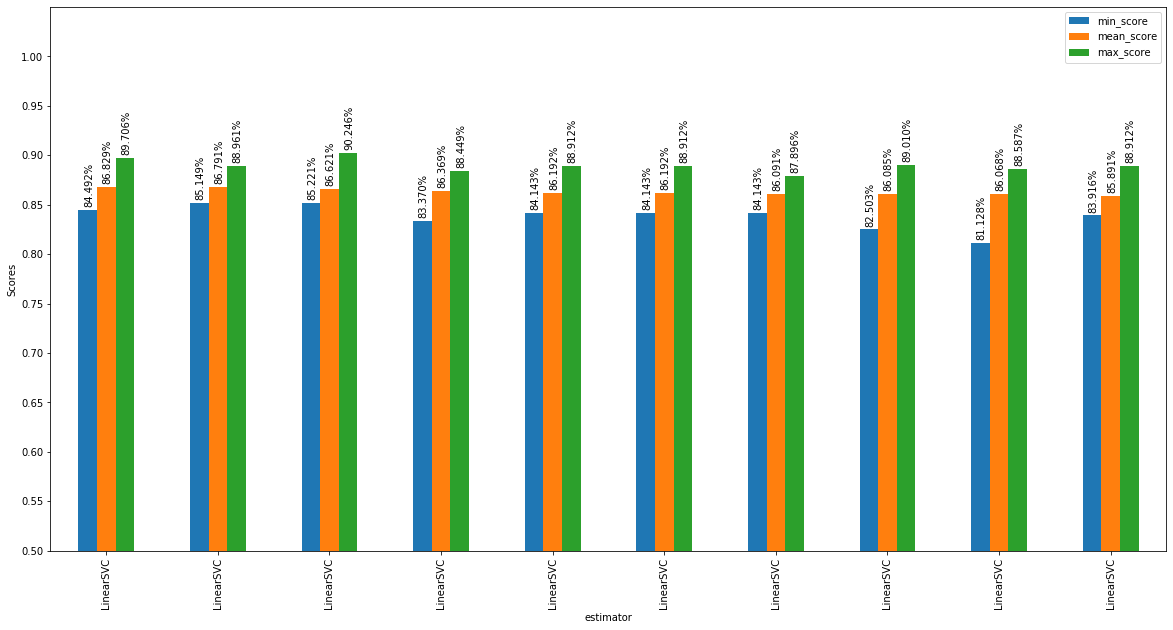

________________________________________________________________________
Running GridSearchCV for LinearSVC.
Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed: 43.4min finished


LinearSVC
     estimator min_score mean_score max_score   std_score  \
0    LinearSVC  0.872498  0.892736   0.906357  0.0122764    
1    LinearSVC  0.873889  0.892396   0.901448  0.0102754    
2    LinearSVC  0.871297  0.891137   0.910264  0.0146912    
3    LinearSVC  0.878611  0.890949   0.910264  0.0136041    
4    LinearSVC  0.862876  0.889803   0.904061  0.014122     
5    LinearSVC  0.868808  0.889744   0.90241   0.0128781    
6    LinearSVC  0.845391  0.888122   0.918739  0.0243337    
7    LinearSVC  0.870363  0.88762    0.911552  0.0155226    
8    LinearSVC  0.854295  0.887379   0.9035    0.0172782    
9    LinearSVC  0.868033  0.886799   0.89941   0.0125482    
10   LinearSVC  0.864942  0.885839   0.90241   0.0155017    
11   LinearSVC  0.863069  0.885782   0.908148  0.0156021    
12   LinearSVC  0.862015  0.885446   0.904617  0.0166797    
13   LinearSVC  0.872916  0.885413   0.892664  0.00716365   
14   LinearSVC  0.845067  0.885353   0.914951  0.022695     
15   LinearSVC

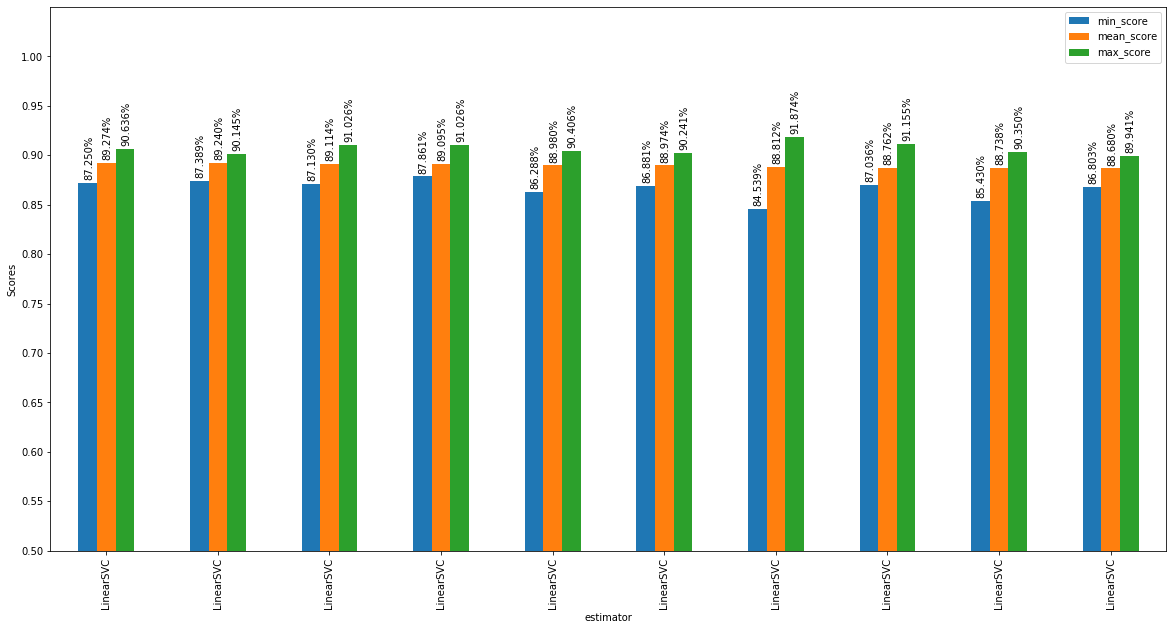

________________________________________________________________________


In [5]:
def ua_tokenizer_sklearn(text,stemmer=True):
    """ Tokenizer for Ukrainian language, returns only alphabetic tokens. 
    
    Keyword arguments:
    text -- text for tokenize 
    stemmer -- if True use UkrainianStemmer for stemming words (default True)
          
    """
    text=re.sub(r"""['’"`�]""", '', text)
    text=re.sub(r"""([0-9])([\u0400-\u04FF]|[A-z])""", r"\1 \2", text)
    text=re.sub(r"""([\u0400-\u04FF]|[A-z])([0-9])""", r"\1 \2", text)
    text=re.sub(r"""[\-.,:+*/_]""", ' ', text)
    if stemmer==True:
        return [UkrainianStemmer(word).stem_word() for word in nltk.word_tokenize(text) if word.isalpha()]
    else:
        return [word for word in nltk.word_tokenize(text) if word.isalpha()]
    
models_params_1={ 
                    
          'LinearSVC': [Pipeline([('Vectorizer',None),
                                             ('feature_selection',SelectFromModel(ExtraTreesClassifier())),                                            
                                             ('clf',LinearSVC())]),
                                       [{'Vectorizer':[TfidfVectorizer(),CountVectorizer()],
                                        'Vectorizer__ngram_range':[(1,1),(1,3)],
                                        'Vectorizer__tokenizer':[None, ua_tokenizer_sklearn],
                                        'feature_selection__estimator':[ExtraTreesClassifier()],
                                        'feature_selection__threshold':[0.00001,0.0001,0.001],
                                        'clf__loss':['squared_hinge'],
                                        'clf__C':[0.1, 1.0,3.0],
                                        'clf__penalty':['l2','l1'],
                                        'clf__class_weight':[None,'balanced'],
                                         'clf__dual':[False]                                      
                                         },
                                       {'Vectorizer':[TfidfVectorizer(),CountVectorizer()],
                                        'Vectorizer__ngram_range':[(1,1),(1,3)],
                                        'Vectorizer__tokenizer':[None, ua_tokenizer_sklearn],
                                        'feature_selection__estimator':[LinearSVC()],
                                        'feature_selection__threshold':[0.5,0.3,0.1,0.01],
                                        'clf__loss':['squared_hinge'],
                                        'clf__C':[0.1, 1.0,3.0],
                                        'clf__penalty':['l2','l1'],
                                        'clf__class_weight':[None,'balanced'],
                                         'clf__dual':[False]                                      
                                         }]]
         
}


GridSearchCV_Classifiers(X=X_train, y=y_train,
                         models_params=models_params_1,scoring='f1_macro',cv=5)

GridSearchCV_Classifiers(X=X_train_zab, y=y_train_zab,
                         models_params=models_params_1,scoring='f1_macro',cv=5)
                         


Приклад відображення класів ділянок на графіках

PCA


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

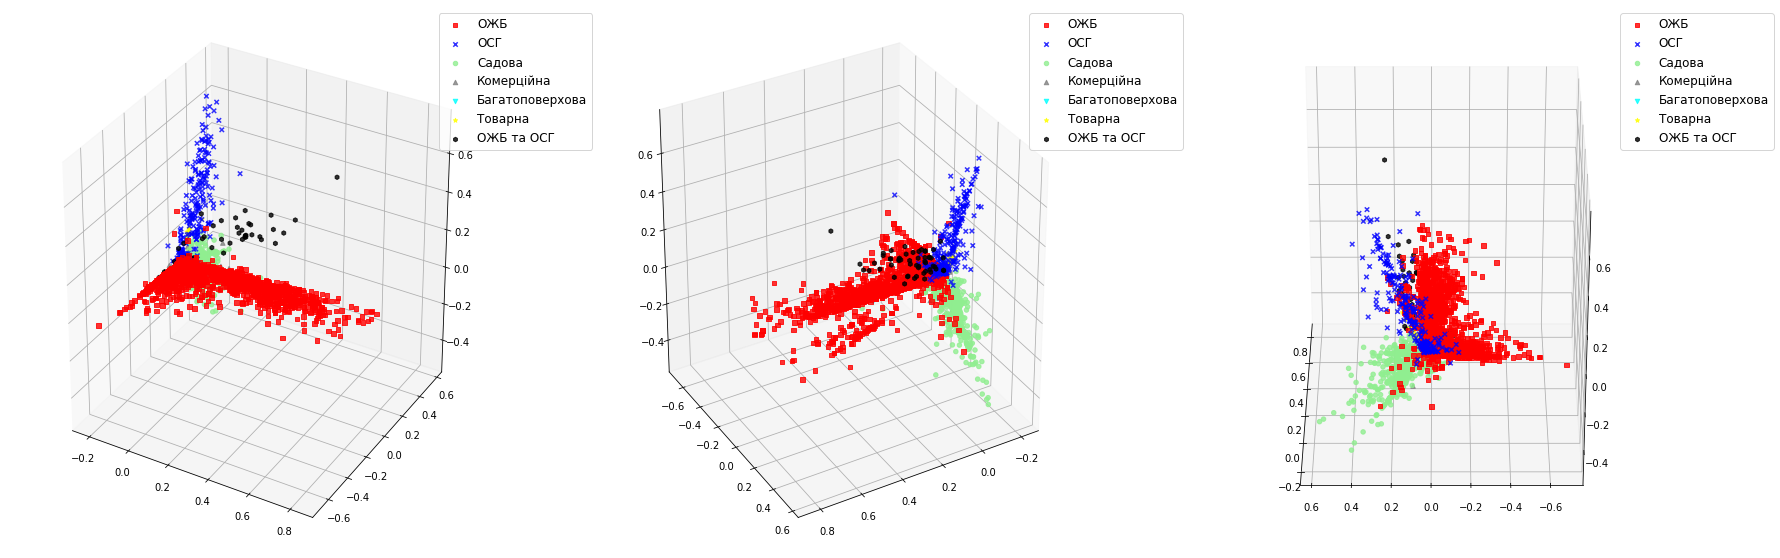

________________________
PCA


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

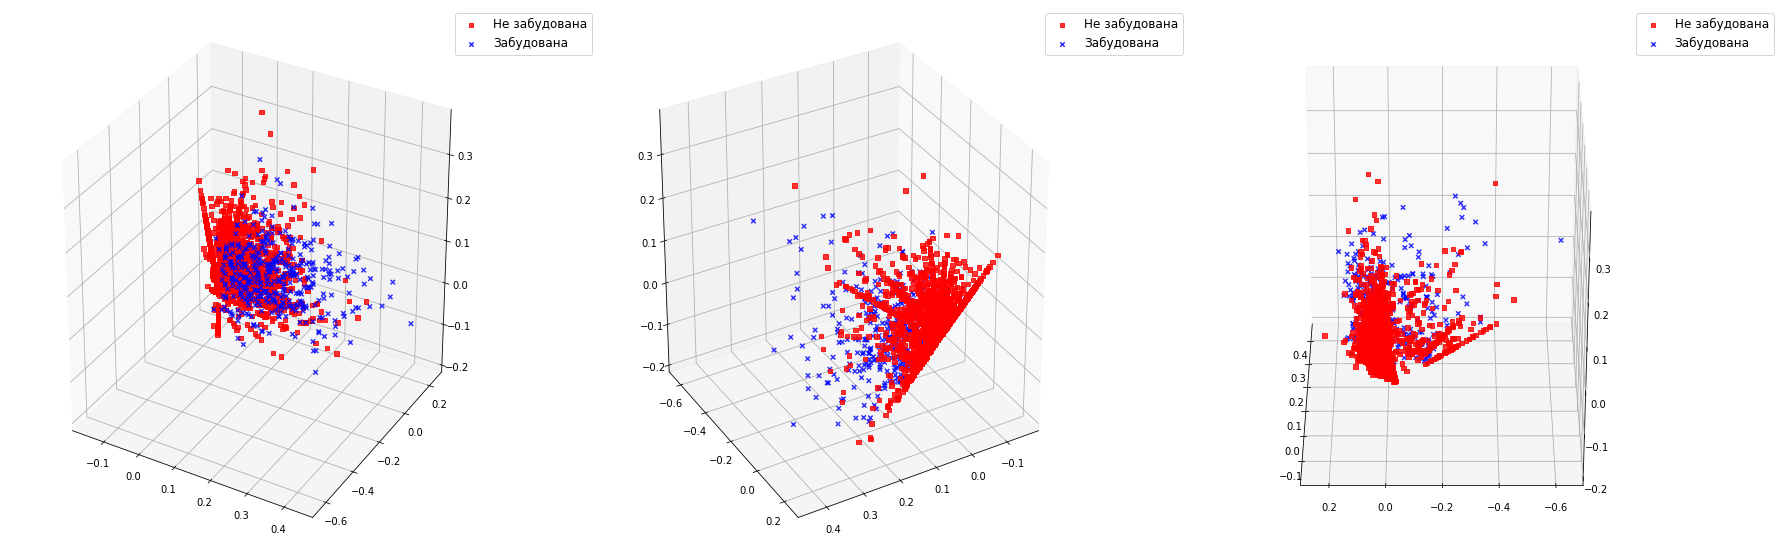

________________________


In [25]:
from data_print import PCA_text_data_display
PCA_text_data_display (X_train,y_train,
                       tokenizer=ua_tokenizer_sklearn,
                       Vectorizer=TfidfVectorizer,
                       expl_lables=land_types,
                       n_components=3,
                       feature_selection=True,
                       selector=SelectFromModel(estimator=ExtraTreesClassifier(n_estimators=500),threshold=0.005))
PCA_text_data_display (X_train_zab,y_train_zab,
                       tokenizer=ua_tokenizer_sklearn,
                       Vectorizer=TfidfVectorizer,
                       expl_lables=built_up,
                       n_components=3,
                       feature_selection=True,
                       selector=SelectFromModel(estimator=ExtraTreesClassifier(n_estimators=500),threshold=0.005))

Приклад використання функції show_most_informative_features()

In [6]:
def show_most_informative_features(vectorizer, feature_selection,expl_lables,n=10):
    feature_names = vectorizer.get_feature_names()
    mask=feature_selection._get_support_mask()
    estimator=feature_selection.estimator_
    coef_ = getattr(feature_selection.estimator_, "coef_", None)
    importances = getattr(feature_selection.estimator_, "feature_importances_", None)       
    features={}
    if importances is None and coef_ is not None:
        for cls_num in range(0,len(feature_selection.estimator_.coef_)):
            if len(feature_selection.estimator_.coef_)==1:
                classes_name=expl_lables[estimator.classes_[cls_num+1]]
            else:    
                classes_name=expl_lables[estimator.classes_[cls_num]]
            sorted_list=sorted([(estimator.coef_[cls_num][i],feature_names[i]) for i in range (0,len(mask)) if mask[i]!=False], reverse=True)
            features['{} - позитивні'.format(classes_name)] = sorted_list[:n]
            features['{} - негативні'.format(classes_name)] = sorted_list[-n:]            

    elif importances is not None:
        features['all'] = sorted([(estimator.feature_importances_[i],feature_names[i]) for i in range (0,len(mask)) if mask[i]!=False], reverse=True)[:n]
   
    print(pd.DataFrame.from_dict(features)) 

Pipe1=Pipeline([('Vectorizer',TfidfVectorizer(ngram_range=(1, 3),
                                             tokenizer=ua_tokenizer_sklearn)),
               ('feature_selection',SelectFromModel(ExtraTreesClassifier(),
                                                    threshold=0.001))])                 
    
Pipe1.fit(X_train_zab,y_train_zab)  
show_most_informative_features(Pipe1.steps[0][1],Pipe1.steps[1][1],expl_lables=built_up) 

Pipe2=Pipeline([('Vectorizer',TfidfVectorizer(ngram_range=(1, 3),
                                             tokenizer=ua_tokenizer_sklearn)),
               ('feature_selection',SelectFromModel(LinearSVC(),
                                                    threshold=0.2))])
Pipe2.fit(X_train_zab,y_train_zab) 
show_most_informative_features(Pipe2.steps[0][1],Pipe2.steps[1][1],expl_lables=built_up) 



                                    all
0  (0.02430637747812043, будинок)      
1  (0.008728641654247799, фундамент)   
2  (0.006165431506609239, стар)        
3  (0.005907149480661364, стар будинок)
4  (0.005902805101801401, на ділянц є) 
5  (0.005782839378295596, ділянц є)    
6  (0.005148097227750278, на ділянц)   
7  (0.005062198989286767, знос)        
8  (0.005003315329296664, кухн)        
9  (0.004918009027181775, деревян)     
            Забудована - позитивні             Забудована - негативні
0  (4.755694797110887, будинок)     (-0.5008619874102563, ділянк в)  
1  (2.8817279416647277, фундамент)  (-0.5166334057853392, ліс)       
2  (1.9421140096807354, стар)       (-0.5721482794454429, будівництв)
3  (1.8532688023794093, є)          (-0.5867742949205849, рівн)      
4  (1.8349295802312835, на ділянц)  (-0.6371623191184629, забудов)   
5  (1.6653677503094604, ділянц)     (-0.6659593589980599, форм)      
6  (1.5956324566518054, будиночок)  (-0.6913067979214133, поряд)     


Побудова функції MySelectFromModel()

In [7]:
from sklearn.feature_selection._from_model import _calculate_threshold


def get_feature_importances(estimator, norm_order=1):
    """Retrieve or aggregate feature importances from estimator"""
    importances = getattr(estimator, "feature_importances_", None)

    coef_ = getattr(estimator, "coef_", None)
    coef_[coef_<0] = 0 # всім коефіцієнтам меншим за 0 присвоїти значення 0

    if importances is None and coef_ is not None:
        if estimator.coef_.ndim == 1:
            importances = np.abs(coef_)

        else:
            importances = np.linalg.norm(coef_, axis=0,
                                         ord=norm_order)

    elif importances is None:
        raise ValueError(
            "The underlying estimator %s has no `coef_` or "
            "`feature_importances_` attribute. Either pass a fitted estimator"
            " to SelectFromModel or call fit before calling transform."
            % estimator.__class__.__name__)

    return importances

class MySelectFromModel(SelectFromModel):
    def _get_support_mask(self):
        # SelectFromModel can directly call on transform.
        if self.prefit:
            estimator = self.estimator
        elif hasattr(self, 'estimator_'):
            estimator = self.estimator_
        else:
            raise ValueError('Either fit the model before transform or set'
                             ' "prefit=True" while passing the fitted'
                             ' estimator to the constructor.')
        scores = get_feature_importances(estimator, self.norm_order)# підредаговано назву функцій
        threshold = _calculate_threshold(estimator, scores, self.threshold)
        if self.max_features is not None:
            mask = np.zeros_like(scores, dtype=bool)
            candidate_indices = \
                np.argsort(-scores, kind='mergesort')[:self.max_features]
            mask[candidate_indices] = True
        else:
            mask = np.ones_like(scores, dtype=bool)
        mask[scores < threshold] = False
        return mask
Pipe=Pipeline([('Vectorizer',TfidfVectorizer(ngram_range=(1, 1),
                                             tokenizer=ua_tokenizer_sklearn)),
               ('feature_selection',MySelectFromModel(LinearSVC(),
                                                    threshold=0.2))])                 
    
Pipe.fit(X_train_zab,y_train_zab)  

show_most_informative_features(Pipe.steps[0][1],Pipe.steps[1][1],expl_lables=built_up) 

    

            Забудована - позитивні                    Забудована - негативні
0  (4.252201726679772, будинок)     (0.20206213563528033, осн)              
1  (3.7114374864324495, фундамент)  (0.2015212451692398, праворуч)          
2  (2.531381815962854, будиночок)   (0.20142729052927238, ват)              
3  (2.1699405597456036, стар)       (0.20096548172437942, моє)              
4  (1.9242828005289412, знос)       (0.20073452474801412, виведен)          
5  (1.772948092425909, вагончик)    (0.20051974619585508, розбудовуєтьсяцін)
6  (1.598773800904067, ділянц)      (0.20051974619585508, коопеаратив)      
7  (1.5021351885487462, хат)        (0.20051974619585508, кадастов)         
8  (1.4839800228901867, будинк)     (0.20051974619585508, дачівул)          
9  (1.4229984774620361, цегл)       (0.2001319845029976, колодн)            


Приклад використання функції MySelectFromModel()

Running GridSearchCV for LinearSVC.
Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 17.3min finished


LinearSVC
     estimator min_score mean_score max_score   std_score  \
0    LinearSVC  0.887701  0.897357   0.907547  0.00709899   
1    LinearSVC  0.88803   0.897177   0.907547  0.00722099   
2    LinearSVC  0.876137  0.8951     0.912879  0.0131744    
3    LinearSVC  0.876428  0.894432   0.910264  0.0108031    
4    LinearSVC  0.879065  0.892956   0.908475  0.0111867    
5    LinearSVC  0.863229  0.892073   0.911968  0.0160503    
6    LinearSVC  0.868808  0.891752   0.9035    0.0125274    
7    LinearSVC  0.867283  0.891595   0.908475  0.0148295    
8    LinearSVC  0.877855  0.889949   0.9035    0.0101991    
9    LinearSVC  0.868704  0.889661   0.910678  0.0147229    
10   LinearSVC  0.88032   0.889643   0.902499  0.00970157   
11   LinearSVC  0.863229  0.889148   0.914951  0.0163722    
12   LinearSVC  0.853421  0.889034   0.905428  0.0184159    
13   LinearSVC  0.869087  0.888934   0.919498  0.0183218    
14   LinearSVC  0.87814   0.888665   0.903361  0.0102063    
15   LinearSVC

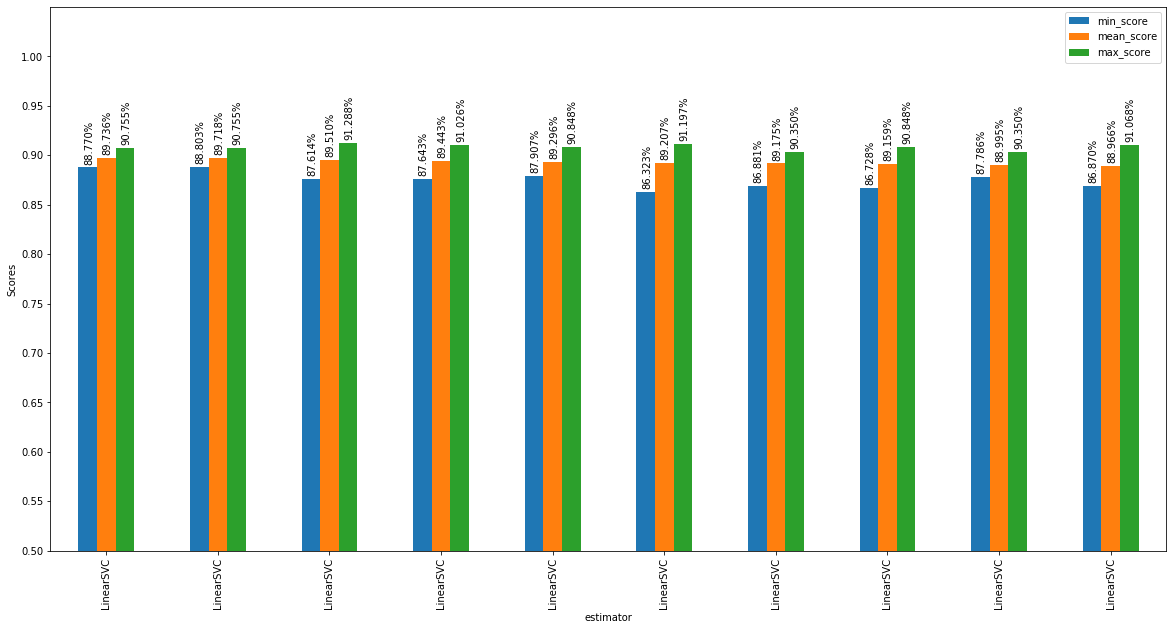

________________________________________________________________________


In [30]:

models_params_1={ 
                    
          'LinearSVC': [Pipeline([('Vectorizer',None),
                                             ('feature_selection',MySelectFromModel(ExtraTreesClassifier())),                                            
                                             ('clf',LinearSVC())]),
                                       
                                       {'Vectorizer':[TfidfVectorizer(),CountVectorizer()],
                                        'Vectorizer__ngram_range':[(1,1),(1,3)],
                                        'Vectorizer__tokenizer':[None, ua_tokenizer_sklearn],
                                        'feature_selection__estimator':[LinearSVC()],
                                        'feature_selection__threshold':[0.5,0.3,0.1,0.01],
                                        'clf__loss':['squared_hinge'],
                                        'clf__C':[0.1, 1.0,3.0],
                                        'clf__penalty':['l2','l1'],
                                        'clf__class_weight':[None,'balanced'],
                                         'clf__dual':[False]                                      
                                         }]
         
}


GridSearchCV_Classifiers(X=X_train_zab, y=y_train_zab,
                         models_params=models_params_1,scoring='f1_macro',cv=5)
                      


Класифікатори із кращими гіперпараметрами

C:\Users\User\Documents\article\data_print.py:50: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fracs, labels=labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=8)


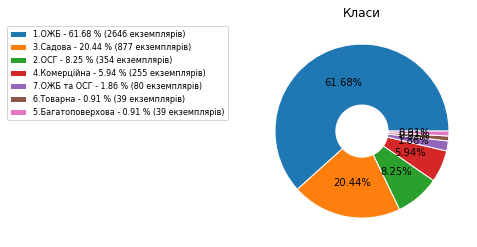

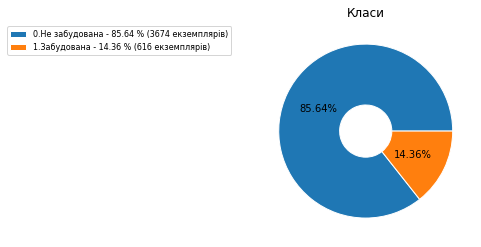

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.0s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.3s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for LinearSVC.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.3s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for LogisticRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.8s remaining:   13.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.5s remaining:    8.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for BaggingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   23.6s remaining:   35.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for MLPClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.8s remaining:   23.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.5s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.3s finished


ExtraTreesClassifier
RandomForestClassifier
LinearSVC
LogisticRegression
DecisionTreeClassifier
BaggingClassifier
MLPClassifier
GradientBoostingClassifier
                    estimator min_score mean_score max_score  std_score  \
0  LinearSVC                   0.828187  0.867557   0.907323  0.0262042   
1  BaggingClassifier           0.842702  0.857065   0.875862  0.0124562   
2  LogisticRegression          0.809428  0.849596   0.875964  0.0236362   
3  RandomForestClassifier      0.819234  0.837202   0.857213  0.0148041   
4  MLPClassifier               0.771593  0.835805   0.896475  0.0410474   
5  GradientBoostingClassifier  0.80196   0.83216    0.905875  0.0380957   
6  ExtraTreesClassifier        0.794906  0.819784   0.852216  0.0205248   
7  DecisionTreeClassifier      0.794511  0.806967   0.827495  0.0133435   

  Vectorizer__ngram_range  \
0  (1, 3)                   
1  (1, 1)                   
2  (1, 3)                   
3  (1, 1)                   
4  (1, 2)               

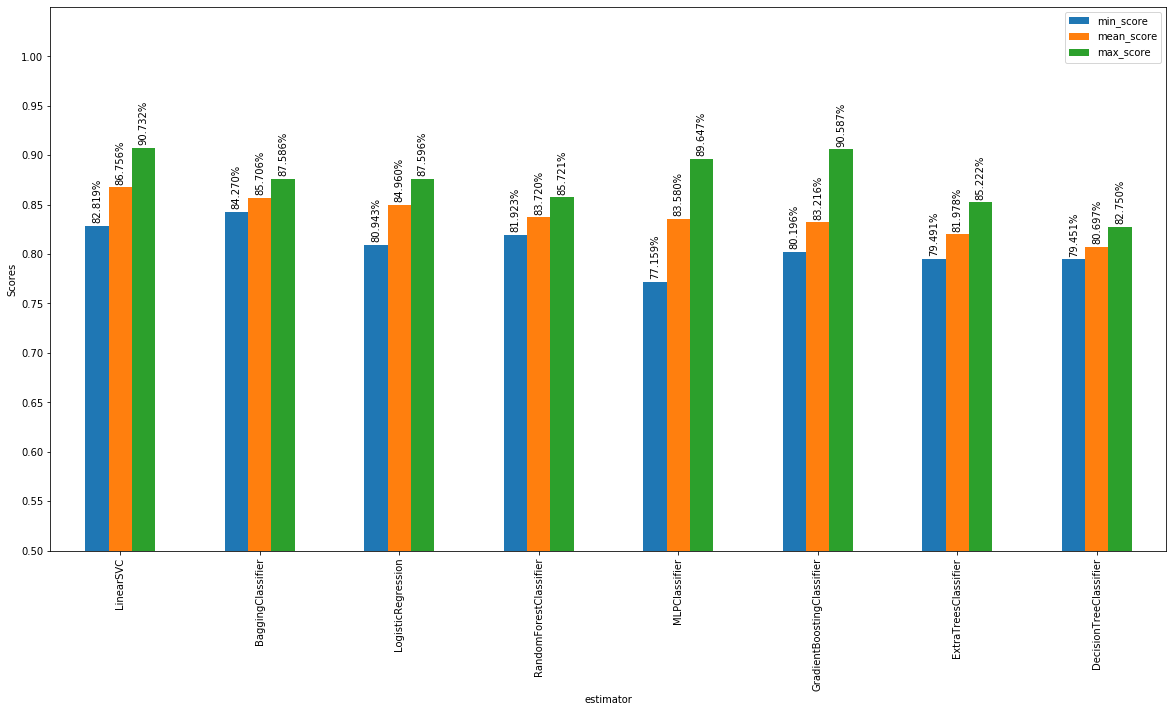

________________________________________________________________________
Running GridSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.9s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.2s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for LogisticRegression.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.5s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for LinearSVC.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.4s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for MLPClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for BaggingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Running GridSearchCV for BalancedBaggingClassifier.
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.0s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.8s finished


ExtraTreesClassifier
RandomForestClassifier
DecisionTreeClassifier
LogisticRegression
GradientBoostingClassifier
LinearSVC
MLPClassifier
BaggingClassifier
BalancedBaggingClassifier
                    estimator min_score mean_score max_score  std_score  \
0  LinearSVC                   0.887701  0.896548   0.9035    0.0060432   
1  BalancedBaggingClassifier   0.854998  0.88322    0.907547  0.0170812   
2  LogisticRegression          0.853771  0.880607   0.90241   0.017627    
3  ExtraTreesClassifier        0.834698  0.878479   0.907547  0.0261568   
4  RandomForestClassifier      0.835326  0.875858   0.901472  0.024367    
5  GradientBoostingClassifier  0.859052  0.872123   0.894173  0.0122854   
6  DecisionTreeClassifier      0.852413  0.87157    0.888054  0.0133594   
7  BaggingClassifier           0.827511  0.867395   0.898224  0.0246619   
8  MLPClassifier               0.846667  0.858917   0.880314  0.012522    

  Vectorizer__ngram_range  \
0  (1, 3)                   
1  (1, 1) 

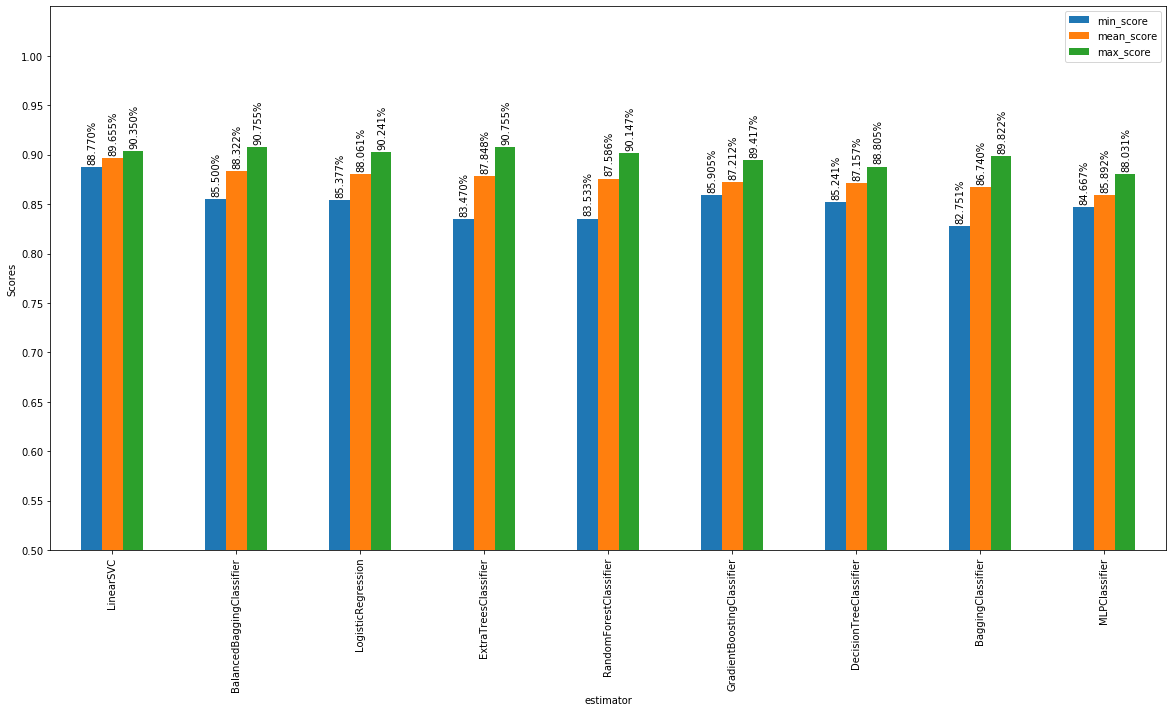

________________________________________________________________________


In [11]:
import numpy as np
import pandas as pd
import nltk
import re
import random
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from imblearn.ensemble import BalancedBaggingClassifier
from data_print import data_class_display,PCA_text_data_display,pp_conf_matrix
from EstimatorSelectionHelper import GridSearchCV_Classifiers, Best_Classifiers
from sklearn.feature_selection import SelectFromModel  
from sklearn.decomposition import KernelPCA

land_data=pd.read_csv('land_real_estate.csv').replace(np.nan, "")
land_data['text']=land_data['description']+' '+land_data['land_types_source']+' '+land_data['land_types_PcmU']
def land_types_download():    
    data=pd.read_csv('land_types.csv')
    data=data[['id','land_types']]
    data=data.set_index('id')
    data=data.T
    data=data.to_dict('records')
    return (data[0])

land_types=land_types_download()
built_up={0:'Не забудована',1:'Забудована'}

def Data_Augmentation(number):
    unigrams_list=['продаж','земельна', 'ділянка', 'іншої', 'інфраструктура', 'інструменту', 'інвентарю', 'ізумрудє', 'івасюка',
                   'яром', 'яворівського', 'шанове', 'чудова','цін', 'цільових', 'цілу', 'цілорічно', 'участке', 'тільки', 'тухолька', 
                   'турківський', 'твердій','сухий', 'суха', 'сусідніх', 'сусідні', 'судова',  'сторони', 'сто', 'стихії','селі', 'села',  
                   'сайті', 'руська', 'росташування','рокитне', 'розташовану', 'розташований', 'розміщені', 'розміщення', 'розміщений', 'розмірі', 
                   'розділена', 'покупцю', 'показ', 'повідомлення', 'питання']
   
    random.seed(0)
    random_words=[unigrams_list[index] for index in random.sample(range(len(unigrams_list)), len(unigrams_list))]
    tsv='для ведення товарного сільськогосподарського виробництва'
    df = pd.DataFrame(columns=['text','land_types','built_up'])
    for sample_index in range(number):
        df = df.append({'text': tsv+' '+" ".join(random.sample(random_words, random.randint(0,20))),'land_types':6,'built_up':0}, ignore_index=True)
    return df.astype({'text':'object','land_types': 'int32','built_up': 'int32'})

land_data=land_data.append(Data_Augmentation(34), ignore_index=True)
data_class_display(dataframe=land_data,class_column='land_types',expl_lables=land_types)
data_class_display(dataframe=land_data,class_column='built_up',expl_lables=built_up)

X_train_zab, X_test_zab, y_train_zab, y_test_zab=train_test_split(land_data['text'],land_data['built_up'],
                                                                  stratify=land_data['built_up'],
                                                                  test_size=0.33,random_state=0)

X_train, X_test, y_train, y_test=train_test_split(land_data['text'],land_data['land_types'],
                                                  stratify=land_data['land_types'],
                                                  test_size=0.33,random_state=0)

models_params_best_typy={
        'ExtraTreesClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                             ('feature_selection',SelectFromModel(ExtraTreesClassifier())),
                                             ('clf',ExtraTreesClassifier())]),
                                      {'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.001],
                                         'clf__max_depth':[None],
                                         'clf__min_impurity_decrease':[0.0001],
                                         'clf__n_estimators':[500],                                         
                                         'clf__bootstrap':[False],
                                         'clf__class_weight':['balanced_subsample'],
                                        },
                                     ],   
         'RandomForestClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                             ('feature_selection',SelectFromModel(LinearSVC())),
                                             ('clf',RandomForestClassifier())]),
                                      
                                      {'Vectorizer':[CountVectorizer()],
                                        'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.5],
                                         'clf__max_depth':[48],
                                         'clf__min_impurity_decrease':[0.0003],
                                         'clf__n_estimators':[250],  
                                         'clf__class_weight':['balanced_subsample'],
                                         'clf__bootstrap':[False],
                                        }],
          
           'LinearSVC': [Pipeline([('Vectorizer',None),
                                             ('feature_selection',MySelectFromModel(LinearSVC())),                                            
                                             ('clf',LinearSVC())]),
                                       
                                       {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.5],
                                        'clf__loss':['squared_hinge'],
                                        'clf__C':[3.5],
                                        'clf__penalty':['l1'],
                                        'clf__class_weight':[None],
                                         'clf__dual':[False]                                      
                                         }],    
          'LogisticRegression': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                             ('feature_selection',SelectFromModel(ExtraTreesClassifier())),
                                             ('clf',LogisticRegression())]),
                                      {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.00001],
                                                                               
                                         'clf__solver':['liblinear'],
                                         'clf__C':[75],
                                         'clf__penalty':['l1'],
                                         'clf__class_weight':['balanced'],
                                        }
                                      ],        
                   
          'DecisionTreeClassifier': [Pipeline([('Vectorizer',CountVectorizer()),('feature_selection',SelectFromModel(ExtraTreesClassifier())),('clf',tree.DecisionTreeClassifier())]),
                                       {'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.000015],
                                        'clf__max_depth':[48],
                                         'clf__min_impurity_decrease':[0.0002],
                                         'clf__criterion':['gini'],
                                        }],           
          'BaggingClassifier': [Pipeline([('Vectorizer',CountVectorizer()),
                                             ('feature_selection',SelectFromModel(ExtraTreesClassifier())),
                                             ('clf',BaggingClassifier())]),
                                      {'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.0006],
                                         'clf__base_estimator':[None],
                                         'clf__bootstrap_features':[False],
                                         'clf__n_estimators':[500],
                                         'clf__warm_start':[True],
                                         'clf__bootstrap':[False],                                         
                                         'clf__max_features':[0.75],   
                                        }],
  
    
          'MLPClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),('feature_selection',SelectFromModel(ExtraTreesClassifier())),('clf',MLPClassifier())]),
                                       {'Vectorizer__ngram_range':[(1,2)],
                                         'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                         'feature_selection__threshold':[0.00025],
                                         'clf__activation':['tanh'],
                                         'clf__solver':['adam'],
                                         'clf__learning_rate':['invscaling'],
                                         'clf__alpha':[0.05],
                                        }],  
        'GradientBoostingClassifier': [Pipeline([('Vectorizer',CountVectorizer()),
                                             ('feature_selection',SelectFromModel(LinearSVC())),
                                             ('clf',GradientBoostingClassifier())]),                                      
                                      {'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.3], 
                                         'clf__learning_rate':[0.5],
                                         'clf__n_estimators':[250],
                                         'clf__max_depth':[12],                                       
                                      
                                        }]  
           
    
}


models_params_best_typy1={ 
          'GradientBoostingClassifier': [Pipeline([('Vectorizer',CountVectorizer()),
                                             ('feature_selection',SelectFromModel(LinearSVC())),
                                             ('clf',GradientBoostingClassifier())]),                                      
                                      {'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.3], 
                                         'clf__learning_rate':[0.5],
                                         'clf__n_estimators':[250],
                                         'clf__max_depth':[12],                                       
                                      
                                        }]  
}


GridSearchCV_Classifiers(X=X_train, y=y_train,
                         models_params=models_params_best_typy,scoring='f1_macro',cv=5,
                       savefig_dir='C:/Users/User/Documents/article/Рис 7_1.png')

models_params_best_zab={ 
           'ExtraTreesClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                              ('feature_selection',MySelectFromModel(LinearSVC())),
                                              ('clf',ExtraTreesClassifier())]),
                                      
                                      { 'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],                                        
                                        'feature_selection__threshold':[0.4],                                       
                                         'clf__max_depth':[33],
                                         'clf__min_impurity_decrease':[0.000001],
                                         'clf__n_estimators':[1000],                                         
                                         'clf__bootstrap':[False],
                                        }],
    
         'RandomForestClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                              ('feature_selection',MySelectFromModel(LinearSVC())),
                                              ('clf',RandomForestClassifier())]),
                                      
                                      {'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],                                       
                                        'feature_selection__threshold':[0.4],                                       
                                          'clf__max_depth':[34],
                                         'clf__min_impurity_decrease':[0.00001],
                                         'clf__n_estimators':[1000],  
                                         'clf__class_weight':[None],
                                         'clf__bootstrap':[False]
                                        }],
        'DecisionTreeClassifier': [Pipeline([('Vectorizer',CountVectorizer()),
                                             ('feature_selection',MySelectFromModel(LinearSVC())),
                                             ('clf',tree.DecisionTreeClassifier())]),
                                      
                                      {'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[None],
                                        'feature_selection__threshold':[0.6],                                       
                                         'clf__max_depth':[64],
                                         'clf__min_impurity_decrease':[0.000001],
                                         'clf__criterion':['entropy'],
                                        }],
        'LogisticRegression': [Pipeline([('Vectorizer',CountVectorizer()),
                                         ('feature_selection',MySelectFromModel(LinearSVC())),
                                         ('pca',KernelPCA()),
                                         ('clf',LogisticRegression())]),
                                      
                                      {'Vectorizer__ngram_range':[(1,1)], 
                                        'feature_selection__threshold':[0.5],                                       
                                         'clf__solver':['saga'],
                                         'clf__C':[100.0],
                                         'clf__penalty':['elasticnet'],                                         
                                         'clf__l1_ratio':[0.5],
                                         'clf__class_weight':[None],
                                        }],
        'GradientBoostingClassifier': [Pipeline([('Vectorizer',CountVectorizer()),
                                                 ('feature_selection',MySelectFromModel(LinearSVC())),
                                                 ('clf',GradientBoostingClassifier())]),                                      
                                      {'Vectorizer__ngram_range':[(1,1)],                                      
                                        'feature_selection__threshold':[0.01],                                       
                                         'clf__max_depth':[9],
                                         'clf__min_impurity_decrease':[0.000001],
                                         'clf__n_estimators':[200],                                         
                                         'clf__loss':['deviance']
                                        }],
                                       
        
        'LinearSVC': [Pipeline([('Vectorizer',None),
                                ('feature_selection',MySelectFromModel(LinearSVC())),
                                ('clf',LinearSVC())]),                                       
                                       {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.1],
                                        'clf__loss':['squared_hinge'],
                                        'clf__C':[3.0],
                                        'clf__penalty':['l1'],
                                        'clf__class_weight':[None],
                                         'clf__dual':[False] 
                                        }],
           
        'MLPClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                    ('feature_selection',MySelectFromModel(LinearSVC())),
                                    ('clf',MLPClassifier())]),                                      
                                      {'Vectorizer__ngram_range':[(1,1)],                                       
                                        'feature_selection__threshold':[0.6],                                       
                                          'clf__activation':['relu'],
                                         'clf__solver':['lbfgs'],
                                         'clf__learning_rate':['invscaling'],
                                         'clf__alpha':[0.0006]
                                        }],  
    
        'BaggingClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                        ('feature_selection',MySelectFromModel(LinearSVC())),
                                        ('clf',BaggingClassifier())]),
                                       
                                      {'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.01],                                       
                                         'clf__base_estimator':[None],
                                         'clf__bootstrap_features':[False],
                                         'clf__n_estimators':[500],
                                         'clf__warm_start':[True],
                                         'clf__bootstrap':[False],
                                         
                                         'clf__max_features':[0.75],   
                                        }], 
        'BalancedBaggingClassifier': [Pipeline([('Vectorizer',CountVectorizer()),
                                        ('feature_selection',MySelectFromModel(LinearSVC())),
                                        ('clf',BalancedBaggingClassifier())]),                                      
                                      {'Vectorizer__ngram_range':[(1,1)],
                                        'feature_selection__threshold':[0.1],                                       
                                         'clf__base_estimator':[None],
                                         'clf__bootstrap_features':[False],
                                         'clf__n_estimators':[500],
                                         'clf__warm_start':[True],
                                         'clf__bootstrap':[False],                                         
                                         'clf__max_features':[0.75],
                                       'clf__sampling_strategy':[0.5], 
                                        }], 


} 





GridSearchCV_Classifiers(X=X_train_zab, y=y_train_zab,
                         models_params=models_params_best_zab,scoring='f1_macro',cv=5)


Кращий класифікатор

LinearSVC


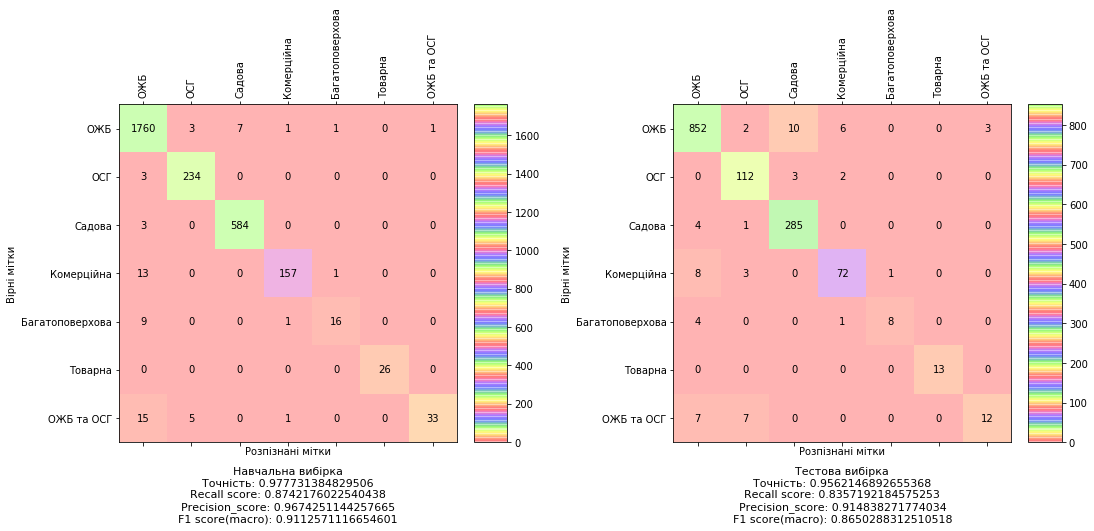

________________________________________________________________________
LinearSVC


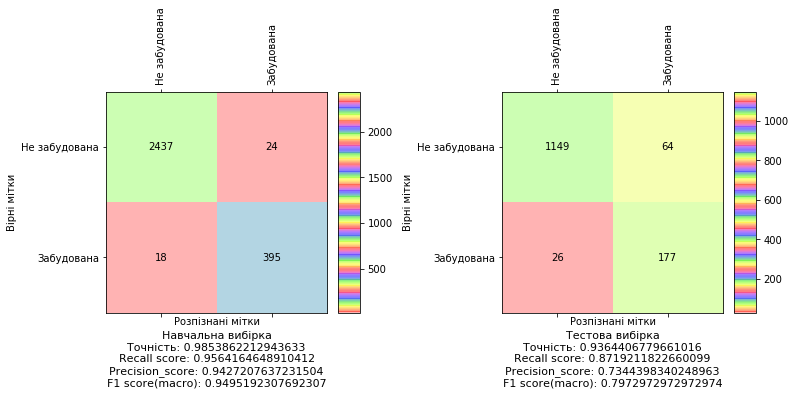

________________________________________________________________________


In [12]:


models_params_best_typy={ 'LinearSVC': [Pipeline([('Vectorizer',None),
                                             ('feature_selection',MySelectFromModel(LinearSVC())),                                            
                                             ('clf',LinearSVC())]),
                                       
                                       {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.5],
                                        'clf__loss':['squared_hinge'],
                                        'clf__C':[3.5],
                                        'clf__penalty':['l1'],
                                        'clf__class_weight':[None],
                                         'clf__dual':[False]                                      
                                         }]}
models_params_best_zab={'LinearSVC': [Pipeline([('Vectorizer',None),
                                ('feature_selection',MySelectFromModel(LinearSVC())),
                                ('clf',LinearSVC())]),                                       
                                       {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.1],
                                        'clf__loss':['squared_hinge'],
                                        'clf__C':[3.0],
                                        'clf__penalty':['l1'],
                                        'clf__class_weight':[None],
                                         'clf__dual':[False] 
                                        }]}


Best_Classifiers(X_train, X_test, y_train, y_test,
                         models_params=models_params_best_typy,expl_lables=land_types)


Best_Classifiers(X_train_zab, X_test_zab, y_train_zab, y_test_zab,
                         models_params=models_params_best_zab,expl_lables=built_up)



Приклад використатння класу VotingClassifier()

VotingClassifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


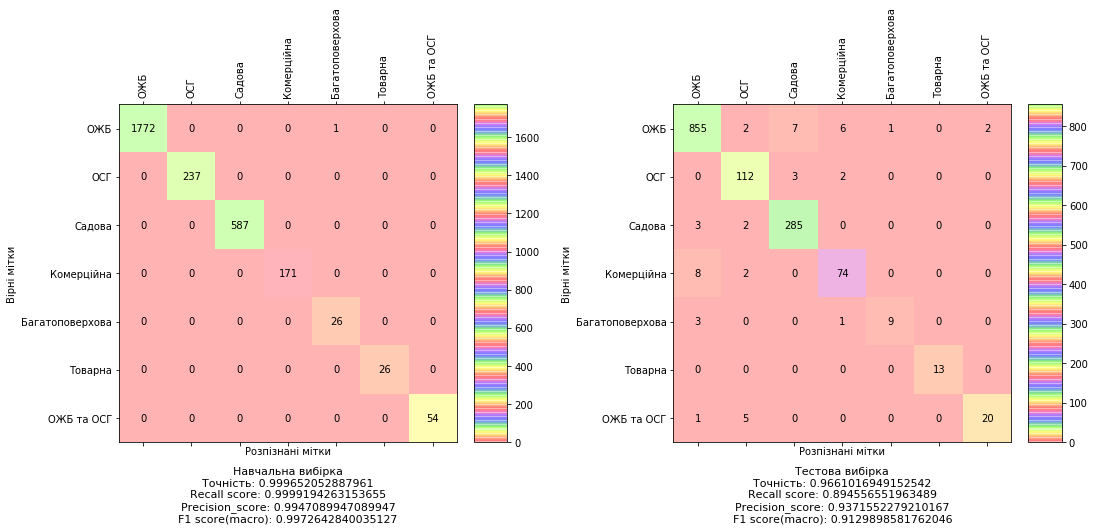

________________________________________________________________________
VotingClassifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


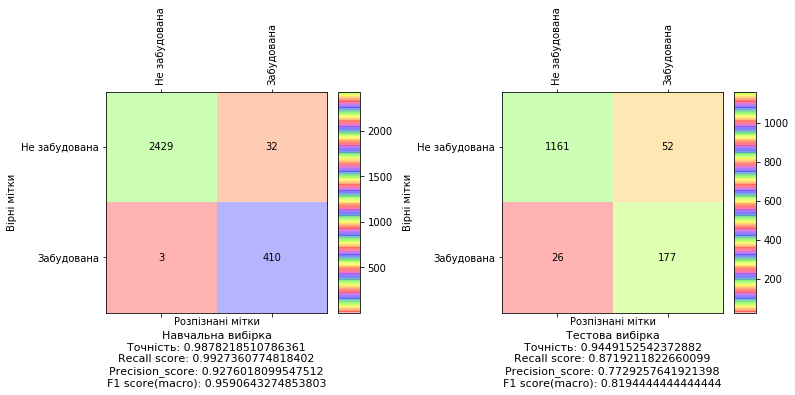

________________________________________________________________________


In [15]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
from EstimatorSelectionHelper import dict_to_models
models_params_best_typy={
         'RandomForestClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                             ('feature_selection',SelectFromModel(LinearSVC())),
                                             ('clf',RandomForestClassifier())]),
                                      
                                      {'Vectorizer':[CountVectorizer()],
                                        'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.5],
                                         'clf__max_depth':[48],
                                         'clf__min_impurity_decrease':[0.0003],
                                         'clf__n_estimators':[250],  
                                         'clf__class_weight':['balanced_subsample'],
                                         'clf__bootstrap':[False],
                                        }],
          
           'LinearSVC': [Pipeline([('Vectorizer',None),
                                             ('feature_selection',MySelectFromModel(LinearSVC())),                                            
                                             ('clf',CalibratedClassifierCV(LinearSVC()))]),
                                       
                                       {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.5],
                                        'clf__base_estimator__loss':['squared_hinge'],
                                        'clf__base_estimator__C':[3.5],
                                        'clf__base_estimator__penalty':['l1'],
                                        'clf__base_estimator__class_weight':[None],
                                         'clf__base_estimator__dual':[False]                                      
                                         }],    
          'LogisticRegression': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                             ('feature_selection',SelectFromModel(ExtraTreesClassifier())),
                                             ('clf',LogisticRegression())]),
                                      {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.00001],
                                                                               
                                         'clf__solver':['liblinear'],
                                         'clf__C':[75],
                                         'clf__penalty':['l1'],
                                         'clf__class_weight':['balanced'],
                                        }
                                      ],        
                   
          'BaggingClassifier': [Pipeline([('Vectorizer',CountVectorizer()),
                                             ('feature_selection',SelectFromModel(ExtraTreesClassifier())),
                                             ('clf',BaggingClassifier())]),
                                      {'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.0006],
                                         'clf__base_estimator':[None],
                                         'clf__bootstrap_features':[False],
                                         'clf__n_estimators':[500],
                                         'clf__warm_start':[True],
                                         'clf__bootstrap':[False],                                         
                                         'clf__max_features':[0.75],   
                                        }],
  
    
      
    
    
    
    
}




estimators_typy=dict_to_models(models_params_best_typy)
VotingClassifier_params_typy={
    'VotingClassifier':[VotingClassifier(estimators=estimators_typy),
                        {'voting':['soft'],
                         'weights':[(1, 1, 1, 1)]}]
} 


Best_Classifiers(X_train, X_test, y_train, y_test,
                         models_params=VotingClassifier_params_typy,expl_lables=land_types)

models_params_best_zab={    
         
    
        'ExtraTreesClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                              ('feature_selection',MySelectFromModel(LinearSVC())),
                                              ('clf',ExtraTreesClassifier())]),
                                      
                                      { 'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],                                        
                                        'feature_selection__threshold':[0.4],                                       
                                         'clf__max_depth':[33],
                                         'clf__min_impurity_decrease':[0.000001],
                                         'clf__n_estimators':[1000],                                         
                                         'clf__bootstrap':[False],
                                        }],
    
        'LogisticRegression': [Pipeline([('Vectorizer',CountVectorizer()),
                                         ('feature_selection',MySelectFromModel(LinearSVC())),
                                         ('pca',KernelPCA()),
                                         ('clf',LogisticRegression())]),
                                      
                                      {'Vectorizer__ngram_range':[(1,1)], 
                                        'feature_selection__threshold':[0.5],                                       
                                         'clf__solver':['saga'],
                                         'clf__C':[100.0],
                                         'clf__penalty':['elasticnet'],                                         
                                         'clf__l1_ratio':[0.5],
                                         'clf__class_weight':[None],
                                        }],

                                       
        
        'LinearSVC': [Pipeline([('Vectorizer',None),
                                ('feature_selection',MySelectFromModel(LinearSVC())),
                                ('clf',CalibratedClassifierCV(LinearSVC()))]),                                       
                                       {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.1],
                                        'clf__base_estimator__loss':['squared_hinge'],
                                        'clf__base_estimator__C':[3.0],
                                        'clf__base_estimator__penalty':['l1'],
                                        'clf__base_estimator__class_weight':[None],
                                         'clf__base_estimator__dual':[False] 
                                        }],
           
      
        'BalancedBaggingClassifier': [Pipeline([('Vectorizer',CountVectorizer()),
                                        ('feature_selection',MySelectFromModel(LinearSVC())),
                                        ('clf',BalancedBaggingClassifier())]),                                      
                                      {'Vectorizer__ngram_range':[(1,1)],
                                        'feature_selection__threshold':[0.1],                                       
                                         'clf__base_estimator':[None],
                                         'clf__bootstrap_features':[False],
                                         'clf__n_estimators':[500],
                                         'clf__warm_start':[True],
                                         'clf__bootstrap':[False],                                         
                                         'clf__max_features':[0.75],
                                       'clf__sampling_strategy':[0.5], 
                                        }],}


estimators_zab=dict_to_models(models_params_best_zab)
VotingClassifier_params_typy={
    'VotingClassifier':[VotingClassifier(estimators=estimators_zab),
                        {'voting':['soft'],
                         'weights':[(1, 2, 3,4)]}]
} 


Best_Classifiers(X_train_zab, X_test_zab, y_train_zab, y_test_zab,
                         models_params=VotingClassifier_params_typy,expl_lables=built_up)



Приклад використатння класу StackingClassifier()

StackingClassifier


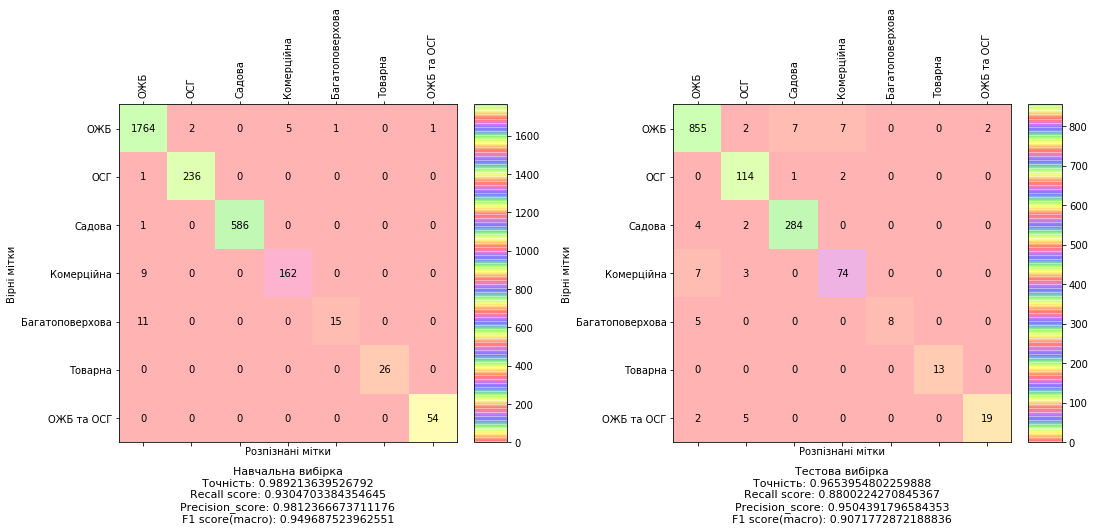

________________________________________________________________________
StackingClassifier


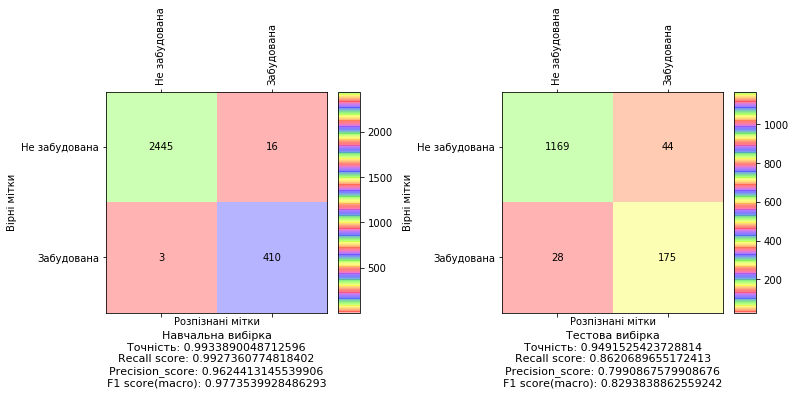

________________________________________________________________________


In [16]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
models_params_best_typy={
         'RandomForestClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                             ('feature_selection',SelectFromModel(LinearSVC())),
                                             ('clf',RandomForestClassifier())]),
                                      
                                      {'Vectorizer':[CountVectorizer()],
                                        'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.5],
                                         'clf__max_depth':[48],
                                         'clf__min_impurity_decrease':[0.0003],
                                         'clf__n_estimators':[250],  
                                         'clf__class_weight':['balanced_subsample'],
                                         'clf__bootstrap':[False],
                                        }],
          
           'LinearSVC': [Pipeline([('Vectorizer',None),
                                             ('feature_selection',MySelectFromModel(LinearSVC())),                                            
                                             ('clf',CalibratedClassifierCV(LinearSVC()))]),
                                       
                                       {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.5],
                                        'clf__base_estimator__loss':['squared_hinge'],
                                        'clf__base_estimator__C':[3.5],
                                        'clf__base_estimator__penalty':['l1'],
                                        'clf__base_estimator__class_weight':[None],
                                         'clf__base_estimator__dual':[False]                                      
                                         }],    
          'LogisticRegression': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                             ('feature_selection',SelectFromModel(ExtraTreesClassifier())),
                                             ('clf',LogisticRegression())]),
                                      {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.00001],
                                                                               
                                         'clf__solver':['liblinear'],
                                         'clf__C':[75],
                                         'clf__penalty':['l1'],
                                         'clf__class_weight':['balanced'],
                                        }
                                      ],        
                   
          'BaggingClassifier': [Pipeline([('Vectorizer',CountVectorizer()),
                                             ('feature_selection',SelectFromModel(ExtraTreesClassifier())),
                                             ('clf',BaggingClassifier())]),
                                      {'Vectorizer__ngram_range':[(1,1)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.0006],
                                         'clf__base_estimator':[None],
                                         'clf__bootstrap_features':[False],
                                         'clf__n_estimators':[500],
                                         'clf__warm_start':[True],
                                         'clf__bootstrap':[False],                                         
                                         'clf__max_features':[0.75],   
                                        }],
  
    
      
    
    
    
    
}







estimators_typy=dict_to_models(models_params_best_typy)
StackingClassifier_params_typy={
    'StackingClassifier':[StackingClassifier(estimators=estimators_typy),
                        {'n_jobs':[-1],
                         'final_estimator':[LinearSVC()]}]
} 


Best_Classifiers(X_train, X_test, y_train, y_test,
                         models_params=StackingClassifier_params_typy,expl_lables=land_types)

models_params_best_zab={    
           'ExtraTreesClassifier': [Pipeline([('Vectorizer',TfidfVectorizer()),
                                              ('feature_selection',MySelectFromModel(LinearSVC())),
                                              ('clf',ExtraTreesClassifier())]),
                                      
                                      { 'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],                                        
                                        'feature_selection__threshold':[0.4],                                       
                                         'clf__max_depth':[33],
                                         'clf__min_impurity_decrease':[0.000001],
                                         'clf__n_estimators':[1000],                                         
                                         'clf__bootstrap':[False],
                                        }],
    
        'LogisticRegression': [Pipeline([('Vectorizer',CountVectorizer()),
                                         ('feature_selection',MySelectFromModel(LinearSVC())),
                                         ('pca',KernelPCA()),
                                         ('clf',LogisticRegression())]),
                                      
                                      {'Vectorizer__ngram_range':[(1,1)], 
                                        'feature_selection__threshold':[0.5],                                       
                                         'clf__solver':['saga'],
                                         'clf__C':[100.0],
                                         'clf__penalty':['elasticnet'],                                         
                                         'clf__l1_ratio':[0.5],
                                         'clf__class_weight':[None],
                                        }],

                                       
        
        'LinearSVC': [Pipeline([('Vectorizer',None),
                                ('feature_selection',MySelectFromModel(LinearSVC())),
                                ('clf',CalibratedClassifierCV(LinearSVC()))]),                                       
                                       {'Vectorizer':[TfidfVectorizer()],
                                        'Vectorizer__ngram_range':[(1,3)],
                                        'Vectorizer__tokenizer':[ua_tokenizer_sklearn],
                                        'feature_selection__threshold':[0.1],
                                        'clf__base_estimator__loss':['squared_hinge'],
                                        'clf__base_estimator__C':[3.0],
                                        'clf__base_estimator__penalty':['l1'],
                                        'clf__base_estimator__class_weight':[None],
                                         'clf__base_estimator__dual':[False] 
                                        }],
           
      
        'BalancedBaggingClassifier': [Pipeline([('Vectorizer',CountVectorizer()),
                                        ('feature_selection',MySelectFromModel(LinearSVC())),
                                        ('clf',BalancedBaggingClassifier())]),                                      
                                      {'Vectorizer__ngram_range':[(1,1)],
                                        'feature_selection__threshold':[0.1],                                       
                                         'clf__base_estimator':[None],
                                         'clf__bootstrap_features':[False],
                                         'clf__n_estimators':[500],
                                         'clf__warm_start':[True],
                                         'clf__bootstrap':[False],                                         
                                         'clf__max_features':[0.75],
                                       'clf__sampling_strategy':[0.5], 
                                        }],}


estimators_zab=dict_to_models(models_params_best_zab)
StackingClassifier_params_zab={
    'StackingClassifier':[StackingClassifier(estimators=estimators_zab),
                        {'n_jobs':[-1],
                         'final_estimator':[LinearSVC()]}]
} 

Best_Classifiers(X_train_zab, X_test_zab, y_train_zab, y_test_zab,
                         models_params=StackingClassifier_params_zab,expl_lables=built_up)